In [1]:
pwd

'/Users/smiyengi/pymaceuticals-challenge'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# merge the data
study_results_combined = pd.merge( study_results, mouse_metadata,  how="left", on="Mouse ID")

study_results_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
len(mouse_metadata["Mouse ID"].unique())

249

In [4]:
len(study_results["Mouse ID"].unique())

249

In [5]:
len(study_results_combined["Mouse ID"].unique())

249

In [6]:
study_results_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
duplicated_rows = study_results_combined.duplicated(subset =["Mouse ID", "Timepoint"])
duplicated_mice = study_results_combined.loc[duplicated_rows, "Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [8]:
# duplicated_mice = study_results_combined.loc['Mouse ID']

In [9]:
study_results_combined.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [10]:
study_results_combined[study_results_combined.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [11]:
study_results_combined[study_results_combined.sort_values(by=['Mouse ID', 'Timepoint']).duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]

/var/folders/5c/zj027psx22l2qj3zj7dd6b9c0000gn/T/ipykernel_58629/1733461526.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  study_results_combined[study_results_combined.sort_values(by=['Mouse ID', 'Timepoint']).duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
study_results_combined[study_results_combined['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
study_results_combined[study_results_combined ['Mouse ID'] != 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
study_results_clean = study_results_combined[study_results_combined['Mouse ID'] != 'g989']
study_results_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
len(study_results_clean["Mouse ID"].unique())

248

In [16]:
study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

In [17]:
study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [18]:

#stats_summary_median = study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].med()
#stats_summary_variance = study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#stats_summary_stdev = study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#stats_summary_sem = study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [19]:
study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [20]:
study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [21]:
study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [22]:
study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [23]:
stats_summary_mean = study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename ('Mean Tumor Volume')
stats_summary_median = study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename('Median Tumor Volume')
stats_summary_variance = study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename('Tumor Volume Variance')
stats_summary_stdev = study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename('Tumor Volume Std Dev')
stats_summary_sem = study_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename('Tumor Volume Std Err')
pd.concat([stats_summary_mean, stats_summary_median, stats_summary_variance, stats_summary_stdev, stats_summary_sem], axis=1)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
summary_stats_dataframe = pd.concat([stats_summary_mean , stats_summary_median, stats_summary_stdev, stats_summary_sem], axis=1)
summary_stats_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [25]:
study_results_clean.groupby('Drug Regimen')['Timepoint'].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

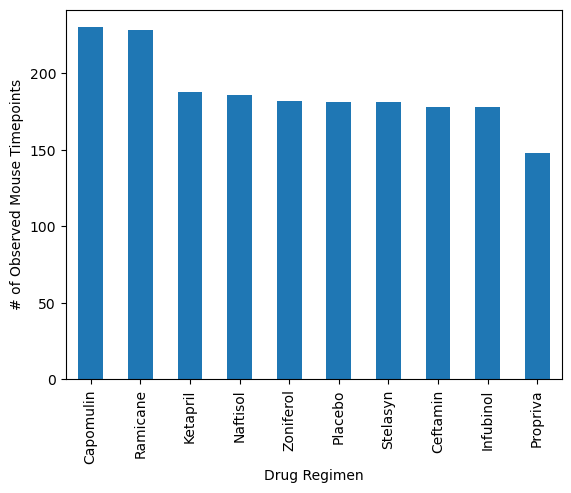

In [26]:
number_observed_timepoints = study_results_clean.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
number_observed_timepoints.plot(xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", kind="bar")

In [27]:
number_observed_timepoints

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

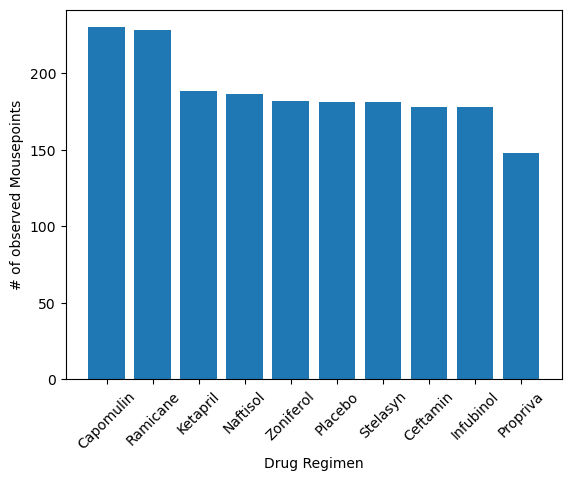

In [28]:
plt.bar(number_observed_timepoints.index, number_observed_timepoints.array)
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mousepoints')
plt.show()